<a href="https://colab.research.google.com/github/Oks11111/TP_entrega_vpc2/blob/main/Clase_2_parte2_Tarea_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio Práctico - Clase 2 VPC2 - 4co2021

Generar una red convolucional con las siguientes caracteristicas:

*   Conv1: cantidad de filtros=16, tramaño de filtro=3, stride=1, padding="same"
*   Pool1: MaxPooling, tamaño de filtro=2, stride=2
*   Conv2: cantidad de filtros=32, tramaño de filtro=3, stride=1, padding="same"
*   Pool2: MaxPooling, tamaño de filtro=2, stride=2
*   Conv3: cantidad de filtros=64, tramaño de filtro=3, stride=1, padding="same"
*   Pool3: MaxPooling, tamaño de filtro=2, stride=2
*   Conv4: cantidad de filtros=128, tramaño de filtro=3, stride=1, padding="same"
*   Linear1: cantidad de neuronas=100
*   Linear2: capa de salida

Elegir la función de activación que crean mas conveniente.

Ejercicios:

1.   Utilizando el dataset CIFAR10, provisto por PyTorch, entrenar la red sin aplicar data augmentation durante, al menos, 20 epocas. Se produce sobreentrenamiento?
> Se produce sobreentrenamiento
2.   Utilizando el mismo dataset y aplicando las tecnicas de data augmentation que considere necesarias, entrenar nuevamente la red durante, al menos, 20 epocas sin que se produzca sobreentrenamiento hasta alcanzar un accuracy de 80% aproximadamente.

3.   A partir de los resultados obtenidos en los puntos anteriores: ¿Por qué cree que en el segundo caso el ritmo de mejora de la red es mas lento que en el primero?
> Se debe al aumento de cantidad de datos. 




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 4.6 MB/s 


In [ ]:
#!pip uninstall -y torchvision
#!pip uninstall -y torchvision # yes run the command again

In [ ]:
#!pip install https://github.com/pytorch/vision/archive/master.zip

In [3]:
import torch
import torch.nn.functional as F
import torchvision
import torchsummary
import torchmetrics

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
### Descripción del conjunto de entrenamiento ###
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
### Dimensiones de un ejemplo del dataset ###
(32, 32, 3)
### Descripción del conjunto de evaluación ###
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
Label de la imágen 0: 6
Label de la imágen 1: 9
Label de la imágen 2: 9
Label de la imágen 3: 4
Label de la imágen 4: 1
Label de la imágen 5: 1
Label de la imágen 6: 2
Label de la imágen 7: 7
Label de la imágen 8: 8


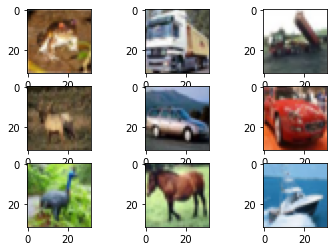

In [4]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

print("### Descripción del conjunto de entrenamiento ###")
print(train_set)
print("### Dimensiones de un ejemplo del dataset ###")
print(np.shape(train_set[0][0]))
print("### Descripción del conjunto de evaluación ###")
print(test_set)

# Ploteo algunas imagenes del dataset y sus etiquetas
for i in range(9):
  image, label = train_set[i]
  plt.subplot(331 + i)
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  print("Label de la imágen {}: {}".format(i, label))

plt.show()

In [ ]:
data_transforms = torchvision.transforms.Compose([
                    torchvision.transforms.Pad(padding=2),
                    torchvision.transforms.ToTensor(),
                    #torchvision.transforms.Normalize(mean=[0, 0, 0], std=[1, 1, 1])
                  ])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms)

valid_set_size = 5000

train_set, valid_set = torch.utils.data.random_split(train_set, [len(train_set) - valid_set_size, valid_set_size])

print("Tamaño del conjunto de entrenamiento: {}".format(len(train_set)))#
print("Tamaño del conjunto de validación: {}".format(len(valid_set)))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=len(valid_set), shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), shuffle=True)



Files already downloaded and verified
Files already downloaded and verified
Tamaño del conjunto de entrenamiento: 45000
Tamaño del conjunto de validación: 5000


#### Vamos correr el mismo modelo con el dataset con data agumentation

In [5]:
data_transforms = torchvision.transforms.Compose([
                    torchvision.transforms.Pad(padding=2),
                    #torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                    torchvision.transforms.RandomHorizontalFlip(0.5)
                    #,torchvision.transforms.functional.adjust_brightness(image,brightness_factor=2)
                    #,torchvision.transforms.GaussianBlur(kernel_size=3)
                    ,torchvision.transforms.ColorJitter(saturation=0.05, hue=0.05)
                    ,torchvision.transforms.RandomResizedCrop(size=(32, 32), scale=(0.5, 1))
                    , torchvision.transforms.ToTensor()])
                   




#transforms.RandomRotation(degrees=180)
#transforms.GaussianBlur(kernel_size=501)
#transforms.functional.adjust_brightness(image,brightness_factor=2)
#transforms.functional.adjust_contrast(image,contrast_factor=3.8)
#transforms.functional.adjust_hue(image,hue_factor=0.3)
#transforms.functional.adjust_saturation(image,saturation_factor=6)
#transforms.functional.adjust_sharpness(image,sharpness_factor=10)
#transforms.functional.equalize(image)
#

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms)

valid_set_size = 10000

train_set, valid_set = torch.utils.data.random_split(train_set, [len(train_set) - valid_set_size, valid_set_size])

print("Tamaño del conjunto de entrenamiento: {}".format(len(train_set)))
print("Tamaño del conjunto de validación: {}".format(len(valid_set)))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=len(valid_set), shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), shuffle=True)

Files already downloaded and verified
Files already downloaded and verified
Tamaño del conjunto de entrenamiento: 40000
Tamaño del conjunto de validación: 10000


# Se corrige el ejercicio entregado, agregando la inicialización del modelo

In [6]:


class LeNet5_2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #cantidad de filtros?
        #Cantidad de canales en la imagen de entrada: in_channels=1
        #Cantidad de canales producidos por la convolución: out_channels=6, 
        #tamaño de filtro (kernel) convolucional: kernel_size=5, 
        #stride: stride=1, 
        #tipo de padding: padding='same'
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding='same')
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding='same')
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv3 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding='same')
        self.pool3 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv4 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding='same')
        self.fc1 = torch.nn.Linear(in_features=2048, out_features=100)
        self.fc2 = torch.nn.Linear(in_features=100, out_features=10)
        #self.drop1 = torch.nn.Dropout(0.1)


    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = torch.relu(self.conv4(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        
        
        return x

lenet5_model_2 = LeNet5_2()

In [11]:
lenet5_optimizer_2 = torch.optim.SGD(lenet5_model_2.parameters(), lr=0.1)

lenet5_loss = torch.nn.CrossEntropyLoss()

lenet5_accuracy = torchmetrics.Accuracy()

In [15]:
# Epocas de entrenamiento
epochs = 50
# Agrego el grafico de la red a Tensorboard.
# [!] Debo pasarle una imagen por un bug en la funcion add_graph.
dataiter = iter(train_loader)
images, labels = dataiter.next()
writer.add_graph(lenet5_model_2, images)

# Defino listas para realizar graficas de los resultados
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

## Defino mi loop de entrenamiento

for epoch in range(epochs):

  epoch_train_loss = 0.0
  epoch_train_accuracy = 0.0

  for train_data, train_target in train_loader:

    # Seteo los gradientes en cero ya que, por defecto, PyTorch
    # los va acumulando
    lenet5_optimizer_2.zero_grad()

    # Realizo el forward pass de nuestro modelo
    output = lenet5_model_2(train_data)

    # Computo el error de la salida comparando contra las etiquetas
    loss = lenet5_loss(output, train_target)

    # Almaceno el error del batch para luego tener el error promedio de la epoca
    epoch_train_loss += loss.item()

    # Computo el nuevo set de gradientes a lo largo de toda la red
    loss.backward()

    # Realizo el paso de optimizacion actualizando los parametros de toda la red
    lenet5_optimizer_2.step()

    # Calculo el accuracy del batch
    accuracy = lenet5_accuracy(output, train_target)

    # Almaceno el accuracy del batch para luego tener el accuracy promedio de la epoca
    epoch_train_accuracy += accuracy.item()

  # Calculo la media de error y accuracy para la epoca de entrenamiento.
  # La longitud de train_loader es igual a la cantidad de batches dentro de una epoca.
  epoch_train_loss = epoch_train_loss / len(train_loader)
  epoch_train_accuracy = epoch_train_accuracy / len(train_loader)
  train_loss.append(epoch_train_loss)
  train_acc.append(epoch_train_accuracy)

  # Realizo el paso de validación computando error y accuracy, y
  # almacenando los valores para imprimirlos y graficarlos
  valid_data, valid_target = iter(valid_loader).next()
  output = lenet5_model_2(valid_data)
  epoch_valid_loss = lenet5_loss(output, valid_target).item()
  epoch_valid_accuracy = lenet5_accuracy(output, valid_target).item()
  valid_loss.append(epoch_valid_loss)
  valid_acc.append(epoch_valid_accuracy)

  print("Epoch: {}/{} - Train loss {:.6f} - Train Accuracy {:.6f} - Valid Loss {:.6f} - Valid Accuracy {:.6f}".format(
      epoch+1, epochs, epoch_train_loss, epoch_train_accuracy, epoch_valid_loss, epoch_valid_accuracy))

  # Escribo los logs dentro de tensorboard
  writer.add_scalar("loss - train", epoch_train_loss, epoch)
  writer.add_scalar("loss - valid", epoch_valid_loss, epoch)
  writer.add_scalar("accuracy - train", epoch_train_accuracy, epoch)
  writer.add_scalar("accuracy - valid", epoch_valid_accuracy, epoch)
  writer.flush()
  
writer.close()

Epoch: 1/50 - Train loss 1.305061 - Train Accuracy 0.532075 - Valid Loss 1.304196 - Valid Accuracy 0.523300
Epoch: 2/50 - Train loss 1.257721 - Train Accuracy 0.551925 - Valid Loss 1.231332 - Valid Accuracy 0.553500
Epoch: 3/50 - Train loss 1.212438 - Train Accuracy 0.563775 - Valid Loss 1.211658 - Valid Accuracy 0.571400
Epoch: 4/50 - Train loss 1.156233 - Train Accuracy 0.590550 - Valid Loss 1.250035 - Valid Accuracy 0.553800
Epoch: 5/50 - Train loss 1.115823 - Train Accuracy 0.603175 - Valid Loss 1.159547 - Valid Accuracy 0.585300
Epoch: 6/50 - Train loss 1.073183 - Train Accuracy 0.618975 - Valid Loss 1.075695 - Valid Accuracy 0.625800
Epoch: 7/50 - Train loss 1.041588 - Train Accuracy 0.630775 - Valid Loss 1.099508 - Valid Accuracy 0.608900
Epoch: 8/50 - Train loss 1.008758 - Train Accuracy 0.644625 - Valid Loss 1.048382 - Valid Accuracy 0.632100
Epoch: 9/50 - Train loss 0.974238 - Train Accuracy 0.655925 - Valid Loss 1.026520 - Valid Accuracy 0.639000
Epoch: 10/50 - Train loss 0.

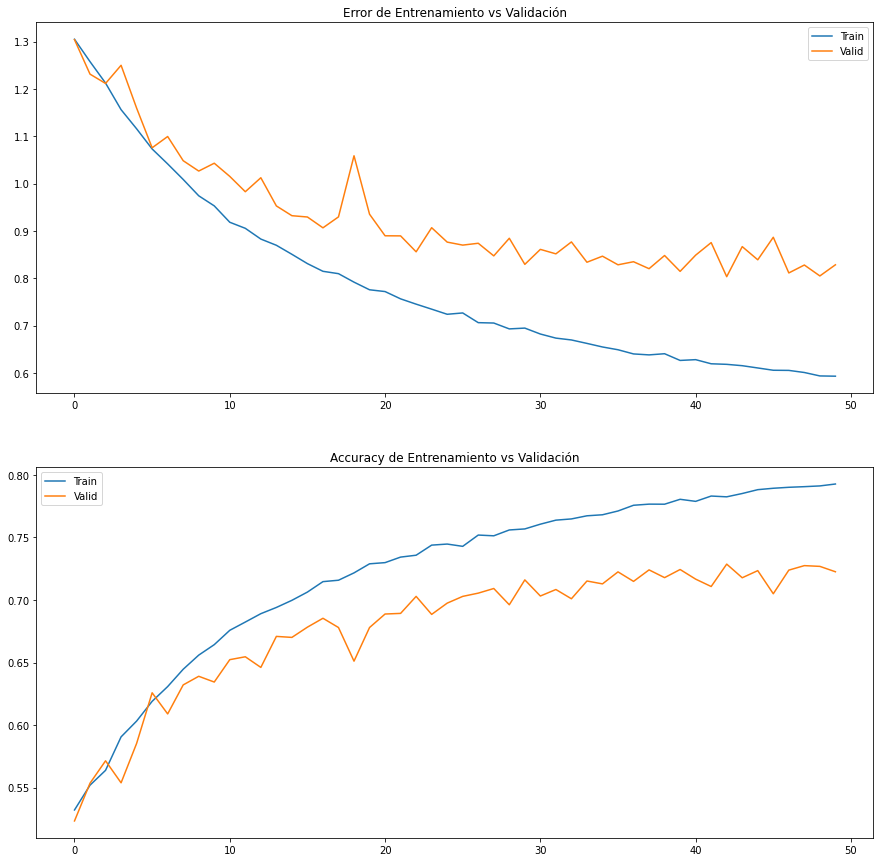

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(train_loss)
axs[0].plot(valid_loss) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])

axs[1].plot(train_acc) 
axs[1].plot(valid_acc) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])